In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/Metaculus/Mobility/master/MobilityData.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head(n=4)

,geo_type,region,transportation_type,alternative_name,sub-region,country,13/01/2020,14/01/2020,15/01/2020,16/01/2020,...,28/09/2020,29/09/2020,30/09/2020,01/10/2020,02/10/2020,03/10/2020,04/10/2020,05/10/2020,06/10/2020,07/10/2020
0,city,New York City,transit,NYC,New York,United States,100.0,92.66,95.29,96.42,...,50.37,47.02,50.69,54.46,59.66,63.07,48.40,49.63,50.57,50.36
1,city,San Francisco - Bay Area,transit,NaN,California,United States,100.0,101.59,104.05,97.69,...,32.83,34.15,34.56,36.59,39.12,36.44,34.09,34.83,32.64,38.88
2,county,Baltimore City,transit,NaN,Maryland,United States,100.0,98.59,102.63,97.84,...,59.98,57.08,60.60,56.86,58.16,56.12,50.31,65.04,59.62,60.75
3,city,Phoenix,transit,NaN,Arizona,United States,100.0,106.52,101.87,100.82,...,63.13,58.84,61.35,63.08,64.65,61.06,49.46,59.69,59.14,62.59


In [4]:
df = df.head(n=4)

In [16]:
def get_moving_avgs(row):
    data = df.loc[row,df.columns[6:]].astype(float).fillna(method='pad')
    return [sum(data[end_idx-7:end_idx])/7 for end_idx in range(7,len(data)+1)]

def plot(data):
    sns.lineplot(x=range(len(moving_avgs)), y=moving_avgs)
    
def reg_plot_after(data, cutoff):
    sns.regplot(x=list(range(cutoff, len(data))), y=data[cutoff:])
    
def fit_and_predict(data, cutoff):
    reg = LinearRegression().fit(np.arange(cutoff, len(data)).reshape(-1,1), data[cutoff:])
    last_day_str = df.columns[-1]
    last_day = date(year=int(last_day_str[-4:]), month=int(last_day_str[3:5]), day=int(last_day_str[:2]))
    resolution_date_1 = date(year=2020,month=10,day=31)
    delta_1 = resolution_date_1 - last_day 
    prediction_1 = reg.predict([[len(data)-1+delta_1.days]]) + (data[-1] - (reg.predict([[len(data)-1]])))
    resolution_date_2 = date(year=2020,month=11,day=28)
    delta_2 = resolution_date_2 - last_day 
    prediction_2 = reg.predict([[len(data)-1+delta_2.days]]) + (data[-1] - (reg.predict([[len(data)-1]])))
    print(f'Predictions: {prediction_1[0]} {prediction_2[0]}')

## New York

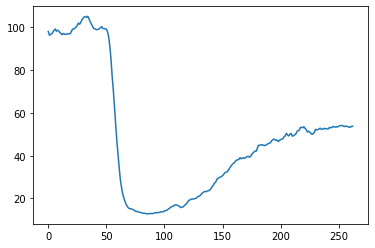

In [17]:
moving_avgs = get_moving_avgs(0)
plot(moving_avgs)

Recent trend

Predictions: 55.027158135981665 56.533842627960276


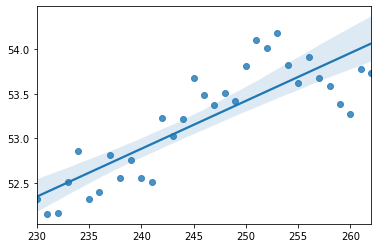

In [18]:
CUTOFF = 230
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

## SF

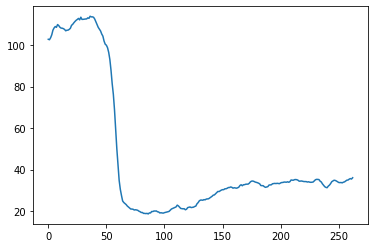

In [19]:
moving_avgs = get_moving_avgs(1)
plot(moving_avgs)

Recent trend

Predictions: 36.73858730264346 37.5019391557275


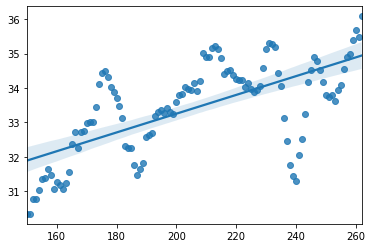

In [20]:
CUTOFF = 150
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Very recent trend

Predictions: 41.109968602825745 46.97326530612246


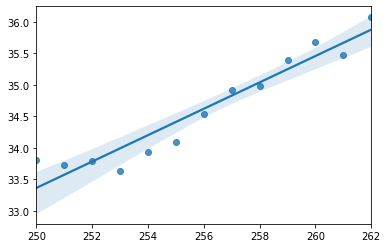

In [21]:
CUTOFF = 250
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

## Phoenix

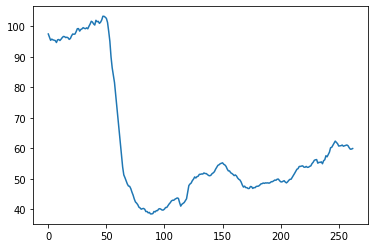

In [22]:
moving_avgs = get_moving_avgs(3)
plot(moving_avgs)

Recent trend

Predictions: 65.21869157340356 71.36216507570771


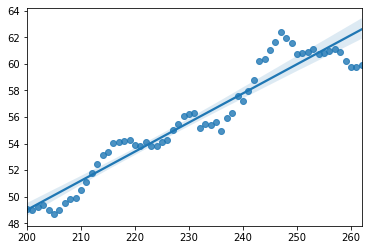

In [23]:
CUTOFF = 200
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Very recent trend

Predictions: 61.067955957086404 62.3689045736872


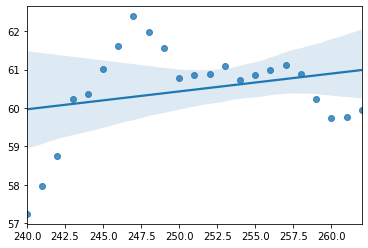

In [24]:
CUTOFF = 240
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)